#           step1:Import All relevant libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

import warnings
np.random.seed(0)
warnings.filterwarnings('ignore')

#### Lets start reading Strors sales prediction data csv file into pandas library 

In [2]:
df_train=pd.read_csv('../INeuron)_intership/Train.csv')

df_test=pd.read_csv('../INeuron)_intership/Test.csv')

# step2:Data Inspection

In [3]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
df_train.shape,df_test.shape

((8523, 12), (5681, 11))

Here we have 8523 rows and 12 columns in train data whereas test data has 5681 rows and 11 columns

In [6]:
df_train.apply(lambda x:sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
df_test.apply(lambda x:sum(x.isnull()))

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [8]:
df_test.isnull().sum()/df_test.shape[0]*100

Item_Identifier               0.000000
Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64

we have 17% and 28% of missing values in Item_Weight and Outlet_Size

In [9]:
df_train.columns    # features of train data

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [10]:
df_test.columns    # features of test data

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [12]:
Categorical=df_train.select_dtypes(include=[np.object])
print("Categorical features in Train data:",Categorical.shape[1])


Numerical=df_train.select_dtypes(include=[np.float64,np.int64])
print("Numerical features in Train data:",Numerical.shape[1])

Categorical features in Train data: 7
Numerical features in Train data: 5


In [13]:
Categorical=df_test.select_dtypes(include=[np.object])
print("Categorical features in Test data:",Categorical.shape[1])


Numerical=df_test.select_dtypes(include=[np.float64,np.int64])
print("Numerical features in Test data:",Numerical.shape[1])

Categorical features in Test data: 7
Numerical features in Test data: 4


In [14]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [15]:
df_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


# step3: Data Cleaning

### 1) Item_Weight

In [16]:
df_train['Item_Weight'].isnull().sum(),df_test['Item_Weight'].isnull().sum()

(1463, 976)

<AxesSubplot:>

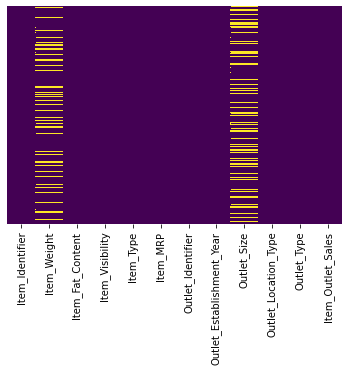

In [17]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Item_Weight'>

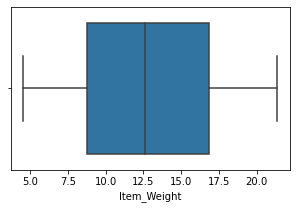

In [18]:
plt.figure(figsize=(5,3))
sns.boxplot('Item_Weight',data=df_train)

<AxesSubplot:xlabel='Item_Weight'>

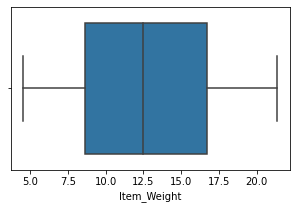

In [19]:
plt.figure(figsize=(5,3))
sns.boxplot('Item_Weight',data=df_test)

Above Boxplot clearly shows that their are no "Outliers" so we can impute missing values with "mean"

In [20]:
df_train['Item_Weight']=df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean())

df_test['Item_Weight']=df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean())

In [21]:
df_train['Item_Weight'].isnull().sum(),df_test['Item_Weight'].isnull().sum()

(0, 0)

Hence we are successfully impute the missing values from Item_weight

### 2) Outlet_Size

In [22]:
df_train['Outlet_Size'].isnull().sum(),df_test['Outlet_Size'].isnull().sum()

(2410, 1606)

In [23]:
df_train['Outlet_Size'].value_counts(),df_test['Outlet_Size'].value_counts()

(Medium    2793
 Small     2388
 High       932
 Name: Outlet_Size, dtype: int64,
 Medium    1862
 Small     1592
 High       621
 Name: Outlet_Size, dtype: int64)

<AxesSubplot:>

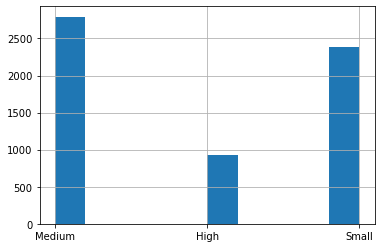

In [24]:
df_train['Outlet_Size'].hist()

Here "Outlet_Size" is categorical column so can impute missing values with "mode"(Most Repeated values) from column

In [25]:
df_train['Outlet_Size']=df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0])

df_test['Outlet_Size']=df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0])

In [26]:
df_train['Outlet_Size'].isna().sum(),df_test['Outlet_Size'].isna().sum()

(0, 0)

Hence we are successfully impute the missing values from Outlet_Size column

# step4: Exploratory Data Analysis

In [27]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# We have to categories the Food ,Drink and Non-Consumable

#### 1) Item_Identifier

In [28]:
def get_two(Id):
    return Id[:2]

In [29]:
# Apply above function to Item_Identifier & make categories

df_train['Item_Identifier'].apply(get_two)
df_train['Item_Identifier']=df_train['Item_Identifier'].apply(get_two)

df_test['Item_Identifier'].apply(get_two)
df_test['Item_Identifier']=df_test['Item_Identifier'].apply(get_two)

df_train['Item_Identifier'].value_counts()

FD    6125
NC    1599
DR     799
Name: Item_Identifier, dtype: int64

#### 2)Item_Fat_Content

In [30]:
df_train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Here are some irregularities in Item_Fat_Content we have to fix them using replace()

In [31]:
df_train['Item_Fat_Content']=df_train['Item_Fat_Content'].replace({'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'})

df_test['Item_Fat_Content']=df_test['Item_Fat_Content'].replace({'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'})

In [32]:
df_train['Item_Fat_Content'].value_counts(),df_test['Item_Fat_Content'].value_counts()

(Low Fat    5517
 Regular    3006
 Name: Item_Fat_Content, dtype: int64,
 Low Fat    3668
 Regular    2013
 Name: Item_Fat_Content, dtype: int64)

Now Item_Fat_Content column have only two categories

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

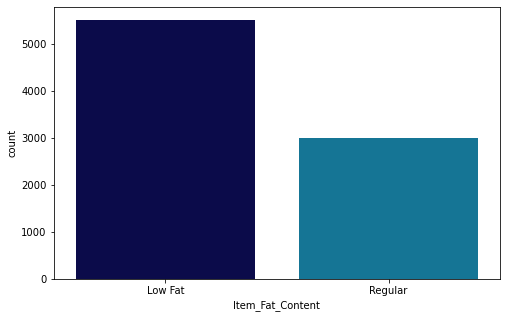

In [33]:
plt.figure(figsize=(8,5))
sns.countplot('Item_Fat_Content',data=df_train,palette='ocean')

Above figure shows more items sold from Low Fat

In [34]:
df_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [35]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NC,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#### 3)Item_Type

In [36]:
df_train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

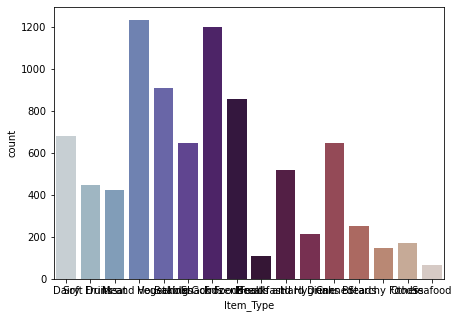

In [37]:
plt.figure(figsize=(7,5))
sns.countplot('Item_Type',data=df_train,palette='twilight')

Here maximum food items are sold

#### 4)Outlet_Size

In [38]:
df_train['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

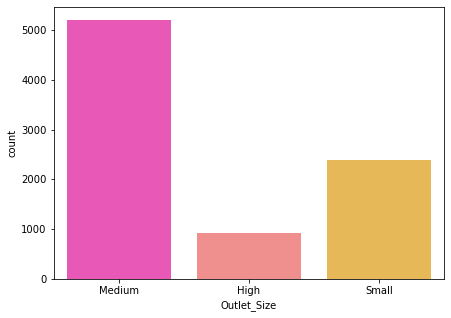

In [39]:
plt.figure(figsize=(7,5))
sns.countplot('Outlet_Size',data=df_train,palette='spring')

Here Medium size oulets are maximum

#### 5)Outlet_Location_Type

In [40]:
df_train['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

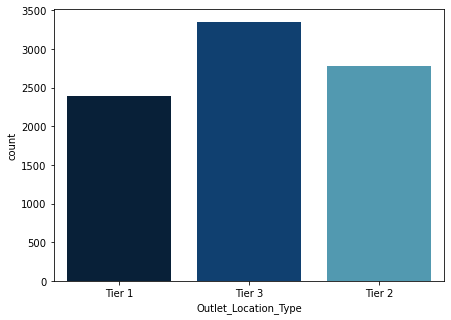

In [41]:
plt.figure(figsize=(7,5))
sns.countplot('Outlet_Location_Type',data=df_train,palette='ocean')

Here maximum outlets are from Tier3 location

#### 6)Outlet_Type

In [42]:
df_train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

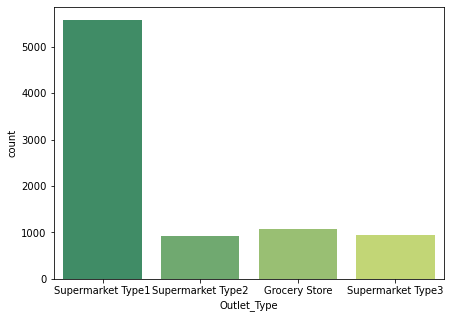

In [43]:
plt.figure(figsize=(7,5))
sns.countplot('Outlet_Type',data=df_train,palette='summer')

Here maximum number of outlets from Supermarket Type1

# step5: Feature Engineering

#### *  Feature Encoding

In [44]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FD,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FD,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NC,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FD,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FD,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [45]:
# Item_Identifier

Item_Id=pd.get_dummies(df_train['Item_Identifier'],prefix='Item_Identifier',drop_first=True)     
Item_Id_te=pd.get_dummies(df_test['Item_Identifier'],prefix='Item_Identifier',drop_first=True)

# Item_Fat_Content

Item_FC=pd.get_dummies(df_train['Item_Fat_Content'],prefix='Item_FatC',drop_first=True)     
Item_FC_te=pd.get_dummies(df_test['Item_Fat_Content'],prefix='Item_FatC',drop_first=True)

# Outlet_Size

Outlet_Size=pd.get_dummies(df_train['Outlet_Size'],prefix='Outlet_Size',drop_first=True)
Outlet_Size_te=pd.get_dummies(df_test['Outlet_Size'],prefix='Outlet_Size',drop_first=True)

# Outlet_Location_Type

Outlet_LT=pd.get_dummies(df_train['Outlet_Location_Type'],prefix='Outlet_LT',drop_first=True)
Outlet_LT_te=pd.get_dummies(df_test['Outlet_Location_Type'],prefix='Outlet_LT',drop_first=True)

Outlet_Type=pd.get_dummies(df_train['Outlet_Type'],prefix='Outlet_Type',drop_first=True)
Outlet_Type_te=pd.get_dummies(df_test['Outlet_Type'],prefix='Outlet_Type',drop_first=True)   

* There are 16 types of items which contains Food,Drinks and Non-Consumable
* Get first two characters of Item type,Renamed it by using lambda and and make it intuitive categories

In [46]:
df_train['Item_Type']=df_train['Item_Identifier'].apply(lambda x: x[0:2])
df_test['Item_Type']=df_test['Item_Identifier'].apply(lambda x: x[0:2])

df_train['Item_Type']=df_train['Item_Identifier'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
df_test['Item_Type']=df_test['Item_Identifier'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})

df_train['Item_Type'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type, dtype: int64

Here we are successfully make the categories

In [47]:
Item_Type=pd.get_dummies(df_train['Item_Type'],prefix='Item_Type',drop_first=True)
Item_Type_te=pd.get_dummies(df_test['Item_Type'],prefix='Item_Type',drop_first=True)

#### Drop the unnecessory features from data which are not help us for analysis

In [48]:
df_train.drop(['Outlet_Identifier','Outlet_Establishment_Year'],axis=1,inplace=True)
df_test.drop(['Outlet_Identifier','Outlet_Establishment_Year'],axis=1,inplace=True)

In [49]:
df_train_final=df_train.select_dtypes(exclude='object')
df_test_final=df_test.select_dtypes(exclude='object')

#### * Concatinate the Encoded features with remaining numeric features

In [50]:
df_train_Concat=pd.concat([df_train_final,Item_Id,Item_FC,Item_Type,Outlet_Size,Outlet_LT,Outlet_Type],axis=1)
df_test_Concat=pd.concat([df_test_final,Item_Id_te,Item_FC_te,Item_Type_te,Outlet_Size_te,Outlet_LT_te,Outlet_Type_te],axis=1)
df_test_Concat

,Item_Weight,Item_Visibility,Item_MRP,Item_Identifier_FD,Item_Identifier_NC,Item_FatC_Regular,Item_Type_Food,Item_Type_Non-Consumable,Outlet_Size_Medium,Outlet_Size_Small,Outlet_LT_Tier 2,Outlet_LT_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20.750000,0.007565,107.8622,1,0,0,1,0,1,0,0,0,1,0,0
1,8.300000,0.038428,87.3198,1,0,1,1,0,1,0,1,0,1,0,0
2,14.600000,0.099575,241.7538,0,1,0,0,1,1,0,0,1,0,0,0
3,7.315000,0.015388,155.0340,1,0,0,1,0,1,0,1,0,1,0,0
4,12.695633,0.118599,234.2300,1,0,1,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500000,0.013496,141.3154,1,0,1,1,0,0,1,0,0,1,0,0
5677,7.600000,0.142991,169.1448,1,0,1,1,0,1,0,0,1,0,1,0
5678,10.000000,0.073529,118.7440,0,1,0,0,1,1,0,1,0,1,0,0
5679,15.300000,0.000000,214.6218,1,0,1,1,0,1,0,1,0,1,0,0


In [51]:
df_train_Concat.corr()['Item_Outlet_Sales'] 

Item_Weight                      0.011550
Item_Visibility                 -0.128625
Item_MRP                         0.567574
Item_Outlet_Sales                1.000000
Item_Identifier_FD               0.031905
Item_Identifier_NC              -0.010861
Item_FatC_Regular                0.018719
Item_Type_Food                   0.031905
Item_Type_Non-Consumable        -0.010861
Outlet_Size_Medium               0.075154
Outlet_Size_Small               -0.098403
Outlet_LT_Tier 2                 0.058261
Outlet_LT_Tier 3                 0.046376
Outlet_Type_Supermarket Type1    0.108765
Outlet_Type_Supermarket Type2   -0.038059
Outlet_Type_Supermarket Type3    0.311192
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:>

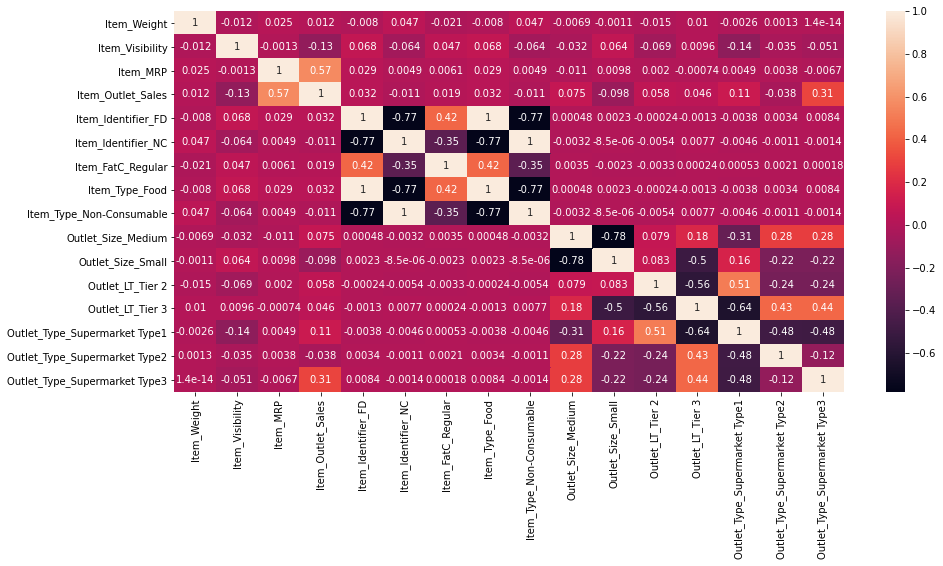

In [52]:
plt.figure(figsize=(15,7))
corr_map=df_train_Concat.corr()
sns.heatmap(corr_map,annot=True,linewidths=0)

In [53]:
X=df_train_Concat.drop(['Item_Outlet_Sales'],axis=1)
Y=df_train_final['Item_Outlet_Sales']

# step6: Model Building

In [54]:
X_train,X_valid,Y_train,Y_valid = train_test_split( X,Y,test_size=0.20, random_state=42)

### Linear Regression

In [55]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [56]:
model.score(X_valid,Y_valid)

0.579247271870701

### Random Forest

In [57]:
model=RandomForestRegressor(n_estimators=200,max_depth=6,min_samples_leaf=10,n_jobs=4)
model.fit(X_train,Y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=10, n_estimators=200,
                      n_jobs=4)

In [58]:
model.predict(X_valid)

array([1289.10486252,  694.59834099,  691.6762007 , ...,  691.6762007 ,
        685.22538474, 1717.8646198 ])

In [59]:
model.score(X_valid,Y_valid)

0.6171782950703288

### Decision Tree

In [60]:
D_model=DecisionTreeRegressor(max_depth=6,random_state=42)
D_model.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=6, random_state=42)

In [61]:
D_model.score(X_valid,Y_valid)

0.5898196904834416

### XgBoost Regressor

In [62]:
model=DecisionTreeRegressor(max_depth=1)

In [63]:
model=XGBRegressor(base_estimators=model,n_estimators=100,learning_rate=0.01)
model.fit(X_train,Y_train)

[16:16:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { base_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_estimators=DecisionTreeRegressor(max_depth=1), base_score=0.5,
             booster='gbtree', colsample_bylevel=1, colsample_bynode=1,
             colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [64]:
model.score(X_valid,Y_valid)

0.3193166396610707